# One qubit Rabi flopping


In [1]:
import numpy as np
from rich import print as pprint
import matplotlib.pyplot as plt
import seaborn as sns

from midstack.interface.analog.operator import *
from midstack.interface.analog.operation import *
from midstack.backend.metric import *
from midstack.backend.task import Task, TaskArgsAnalog
from midstack.backend import QutipBackend

In [2]:
X = PauliX()
Z = PauliZ()

Hx = AnalogGate(hamiltonian=X)

circuit = AnalogCircuit()
circuit.evolve(duration=10, gate=Hx)

In [3]:
# define task args
args = TaskArgsAnalog(
    n_shots=100,
    fock_cutoff=4,
    metrics={
        "Z": Expectation(operator=Z),
    },
    dt=1e-3,
)

task = Task(program=circuit, args=args)

In [4]:
backend = QutipBackend()
expt, args = backend.compile(task=task)
results = backend.run(experiment=expt, args=args)

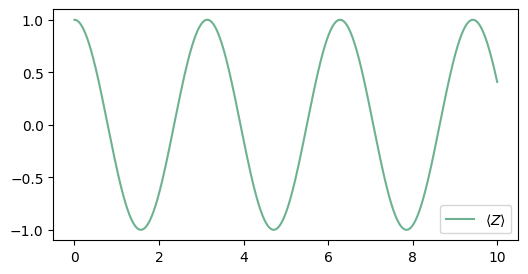

In [5]:
fig, ax = plt.subplots(1, 1, figsize=[6, 3])
colors = sns.color_palette(palette="crest", n_colors=4)

for k, (name, metric) in enumerate(results.metrics.items()):
    ax.plot(results.times, metric, label=f"$\\langle {name} \\rangle$", color=colors[k])
ax.legend()

[Text(0.5, 0, 'Basis state'),
 Text(0, 0.5, 'Amplitude (imag)'),
 (-3.141592653589793, 3.141592653589793)]

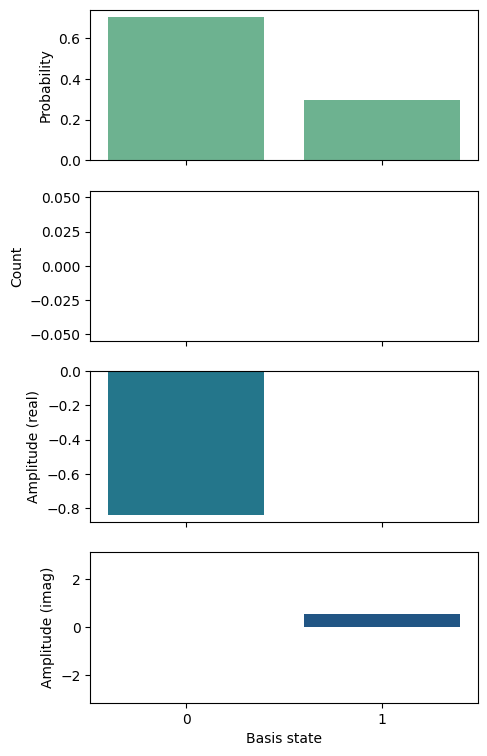

In [6]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=[5, 9])

state = np.array([basis.real + 1j * basis.imag for basis in results.state])
bases = ["0", "1"]
counts = {basis: results.counts.get(basis, 0) for basis in bases}

ax = axs[0]
ax.bar(x=bases, height=np.abs(state) ** 2, color=colors[0])
ax.set(ylabel="Probability")


ax = axs[1]
ax.bar(x=bases, height=list(counts.values()), color=colors[1])
ax.set(ylabel="Count")


ax = axs[2]
ax.bar(x=bases, height=state.real, color=colors[2])
ax.set(ylabel="Amplitude (real)")

ax = axs[3]
ax.bar(x=bases, height=state.imag, color=colors[3])
ax.set(xlabel="Basis state", ylabel="Amplitude (imag)", ylim=[-np.pi, np.pi])